In [22]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from ssim import SSIM
from ssim.utils import get_gaussian_kernel

gaussian_kernel_sigma = 1.5
gaussian_kernel_width = 11
gaussian_kernel_1d = get_gaussian_kernel(gaussian_kernel_width, gaussian_kernel_sigma)


In [23]:
size = (256,256)

im = Image.open('test-images/test3-orig.jpg')
im = im.resize(size, Image.ANTIALIAS)

# slightly rotated image
im_rot = Image.open('test-images/test3-rot.jpg')
im_rot = im_rot.resize(size, Image.ANTIALIAS)

# slightly modified lighting conditions
im_lig = Image.open('test-images/test3-lig.jpg')
im_lig = im_lig.resize(size, Image.ANTIALIAS)

# image cropped
im_cro = Image.open('test-images/test3-cro.jpg')
im_cro = im_cro.resize(size, Image.ANTIALIAS)

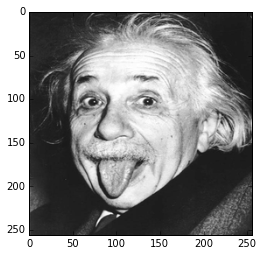

In [24]:
im_gray = ImageOps.grayscale(im)
plt.imshow(np.asarray(im_gray),cmap='gray',vmin=0,vmax=255)

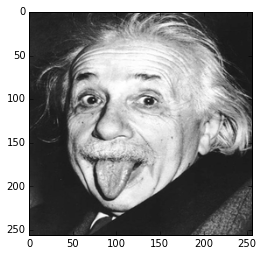

In [25]:
im_rot_gray = ImageOps.grayscale(im_rot)
plt.imshow(np.asarray(im_rot_gray),cmap='gray',vmin=0,vmax=255)

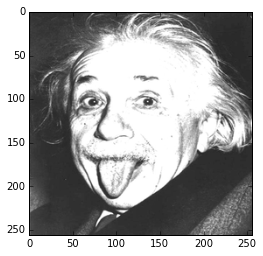

In [26]:
im_lig_gray = ImageOps.grayscale(im_lig)
plt.imshow(np.asarray(im_lig_gray),cmap='gray',vmin=0,vmax=255)

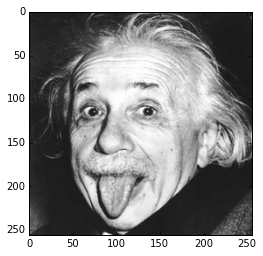

In [27]:
im_cro_gray = ImageOps.grayscale(im_cro)
plt.imshow(np.asarray(im_cro_gray),cmap='gray',vmin=0,vmax=255)

In [28]:
ssim_rot = SSIM(im, gaussian_kernel_1d).ssim_value(im_rot)
ssim_lig = SSIM(im, gaussian_kernel_1d).ssim_value(im_lig)
ssim_cro = SSIM(im, gaussian_kernel_1d).ssim_value(im_cro)

print("SSIM of rotated image %.4f" % ssim_rot)
print("SSIM of modified lighting image %.4f" % ssim_lig)
print("SSIM of cropped image %.4f" % ssim_cro)

SSIM of rotated image 0.4971
SSIM of modified lighting image 0.8603
SSIM of cropped image 0.3958


In [29]:
cw_ssim_rot = SSIM(im).cw_ssim_value(im_rot)
cw_ssim_lig = SSIM(im).cw_ssim_value(im_lig)
cw_ssim_cro = SSIM(im).cw_ssim_value(im_cro)

print("CW-SSIM of rotated image %.4f" % cw_ssim_rot)
print("CW-SSIM of modified lighting image %.4f" % cw_ssim_lig)
print("CW-SSIM of cropped image %.4f" % cw_ssim_cro)

CW-SSIM of rotated image 0.8724
CW-SSIM of modified lighting image 0.9668
CW-SSIM of cropped image 0.7171
